# FIFA Player Attributes & Scores

This dataset gives information about several football players with respect to their performance scores in various aspects. To be precise, the data contains 43 attributes, of which 5 are non-essential (ID's and date), leaving us with 38 important attributes. For each attribute, higher the score, better the player's performance in that aspect. The dataset contains 2 notable variables: overall_rating and potential rating. Based on a player's performance and reputation, talent scouts will assign overall ratings & potential ratings to players, and classify them as "Showing great potential", "Exciting prospect", "Has the potential to be special", "Dynamic potential" etc. 

Each player in FIFA Ultimate Team has an overall rating as well as six scores for the key stats: Pace, Shooting, Passing, Dribbling, Defending, and Physical (These have been named slightly different in our dataset, for eg. Shooting is 'shot_power'). These stats are combined with a player's international recognition to calculate the player's overall rating.

We will utilize this dataset to predict a player's overall_rating.

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [415]:
player=pd.read_csv('Player_Attributes.csv')

### Data Analysis

All variables do not have equal numbers of non-null values. Data needs cleaning.

In [406]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
Unnamed: 0             183978 non-null int64
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_con

In [292]:
player.head(2)

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


Visualizing the amount of nulls in each attribute: Does not seem to be a lot

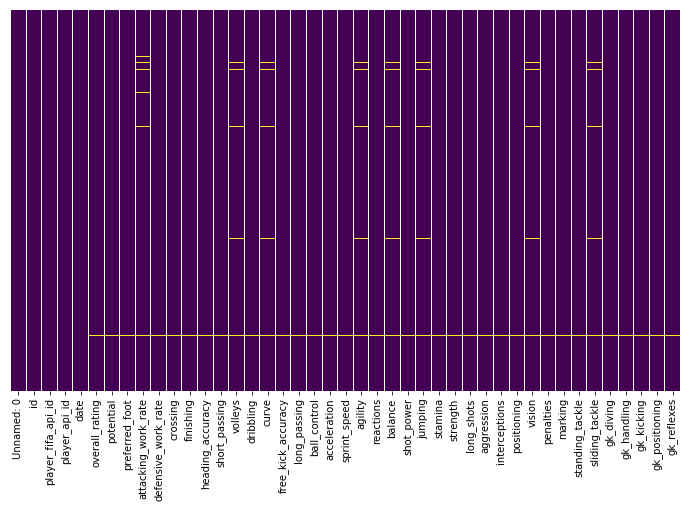

In [293]:
plt.figure(figsize=(12,7))
sns.heatmap(player.isnull(), cbar=False, cmap='viridis', yticklabels=False)

Checking the %age of nulls in each attribute:

In [294]:
print("%age of nulls in various attribues of player:\n")
for i in player.columns:
    print(i,"\t", round(sum(player[i].isnull())*100/len(player[i]), 2),"%")

%age of nulls in various attribues of player:

Unnamed: 0 	 0.0 %
id 	 0.0 %
player_fifa_api_id 	 0.0 %
player_api_id 	 0.0 %
date 	 0.0 %
overall_rating 	 0.45 %
potential 	 0.45 %
preferred_foot 	 0.45 %
attacking_work_rate 	 1.76 %
defensive_work_rate 	 0.45 %
crossing 	 0.45 %
finishing 	 0.45 %
heading_accuracy 	 0.45 %
short_passing 	 0.45 %
volleys 	 1.47 %
dribbling 	 0.45 %
curve 	 1.47 %
free_kick_accuracy 	 0.45 %
long_passing 	 0.45 %
ball_control 	 0.45 %
acceleration 	 0.45 %
sprint_speed 	 0.45 %
agility 	 1.47 %
reactions 	 0.45 %
balance 	 1.47 %
shot_power 	 0.45 %
jumping 	 1.47 %
stamina 	 0.45 %
strength 	 0.45 %
long_shots 	 0.45 %
aggression 	 0.45 %
interceptions 	 0.45 %
positioning 	 0.45 %
vision 	 1.47 %
penalties 	 0.45 %
marking 	 0.45 %
standing_tackle 	 0.45 %
sliding_tackle 	 1.47 %
gk_diving 	 0.45 %
gk_handling 	 0.45 %
gk_kicking 	 0.45 %
gk_positioning 	 0.45 %
gk_reflexes 	 0.45 %


### Checking values in the string variables, treating nulls and creating dummies

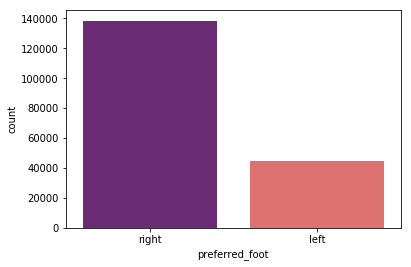

In [416]:
sns.countplot('preferred_foot', data=player, palette='magma')

75.23% are right foot, 24.31% are left foot, 0.45% Null. Hence, mode='right' was imputed.

In [417]:
player['preferred_foot'].fillna(value=player['preferred_foot'].mode()[0], inplace=True)

Work rates can only be high, medium, or low. But there are other entries listed in the dataset.
We shall classify these wrong entries and Null values as a new category, "unknown"

In [418]:
def func(a):
    if a not in ['high', 'low', 'medium'] or len(a)==0:
        a='unknown'
    return a
player['attacking_work_rate']=player['attacking_work_rate'].apply(func)
player['defensive_work_rate']=player['defensive_work_rate'].apply(func)

Dropping those variables such as date and ID's that logically serve no purpose for the predictive modeling

In [419]:
player.drop(['Unnamed: 0', 'id', 'player_fifa_api_id', 'player_api_id', 'date'], axis=1, inplace=True)

### Treating null values in the remaining variables

It is common practice to use the characteristics of an average sportsperson for generalizing sports trends. 
Hence for player scores for every category, Nulls have been replaced with the resp. column means

In [420]:
for i in player.drop(['preferred_foot', 'attacking_work_rate',
       'defensive_work_rate'], axis=1).columns:
    player[i].fillna(value=player[i].mean(), inplace=True)

In [421]:
player.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

Creating dummies for the 3 categorical variables we treated above:

In [422]:
player=pd.get_dummies(player, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], drop_first=True)

### Checking correlation between variables and exploring other relationships (EDA)

The average potential rating for a player is 7.2% higher than players' average overall rating.

In [423]:
player.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_unknown,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_unknown
count,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,...,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000
mean,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,...,20.998362,16.132154,16.441439,0.756857,0.046576,0.679810,0.040853,0.100186,0.711205,0.041630
std,7.025124,6.577276,17.202916,18.995399,16.451399,14.161782,18.121509,17.704326,18.120685,17.791186,...,21.404183,16.062556,17.159036,0.428982,0.210730,0.466551,0.197949,0.300249,0.453204,0.199743
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,...,8.000000,8.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,55.000000,50.000000,...,12.000000,11.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,...,15.000000,15.000000,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the distribution of variables: 'potential' and 'overall_rating': Notice the shift in the mean.

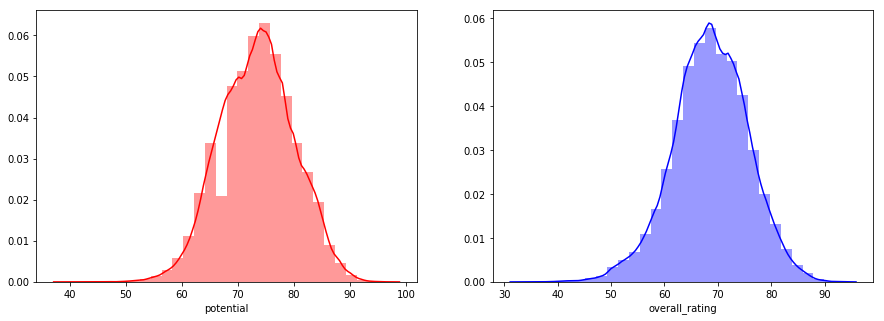

In [331]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(player['potential'], bins=30, color='red')
plt.subplot(1,2,2)
sns.distplot(player['overall_rating'], bins=30, color='blue')

Relationship between overall_rating and potential rating: Footing preference does not seem to contribute to the ratings in a very obvious way.

,overall_rating,potential
overall_rating,1.000000,0.766757
potential,0.766757,1.000000


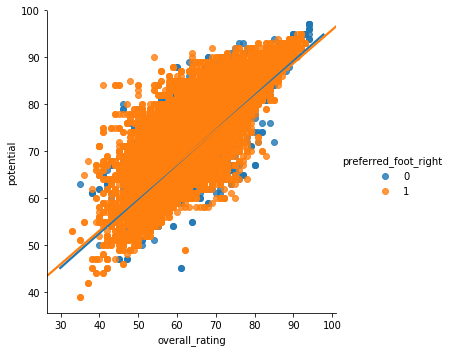

In [338]:
sns.lmplot('overall_rating', 'potential', data=player, hue='preferred_foot_right')
player[['overall_rating', 'potential']].corr()

### Correlation check:

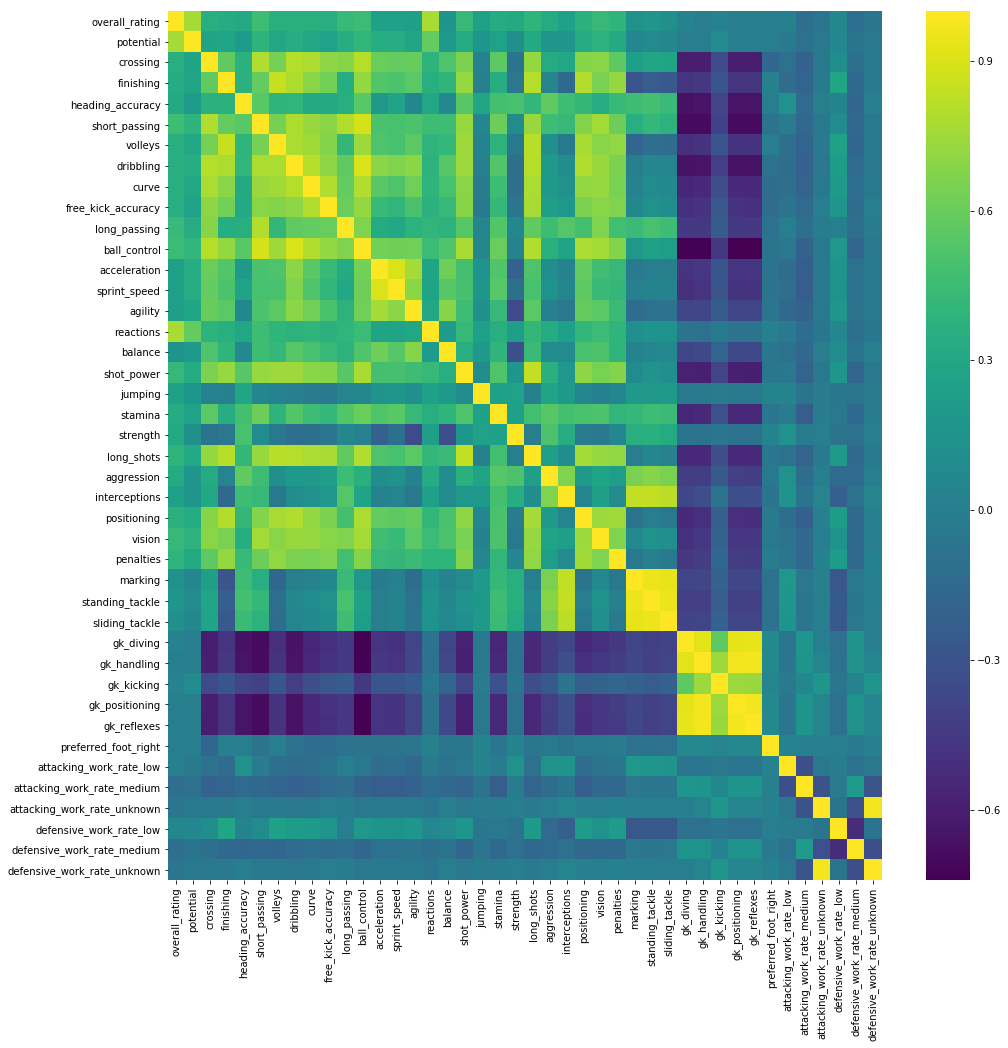

In [339]:
plt.figure(figsize=(16,16))
sns.heatmap(player.corr(), cmap='viridis')

We see that there is high degree of correlation between certain attributes, for eg. positioning and ball control.
This makes sense as those with better ball control score will usually be assigned a better positioning to play from.
Another good eg. is the high correlation between penalties scoring and shot_power scoring.
A high correlation can be noticed amongst various goalkeeping skills' scoring.

So far, the data has been behaving as expected. Certain skills do go hand-in-hand, so it is natural to notice a correlation.

# Predictive Modeling

In [424]:
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Checking if overall_rating and potential are extremely correlated or if there's a possibility of simultaneous causality bias: 

In [425]:
a=player[['overall_rating']]
b=player[['potential']]
lm=LinearRegression()
lm.fit(a,b)
print(lm.intercept_)
print(lm.coef_)
lm.score(a,b)

[24.21402337]
[[0.71787637]]


0.5879158151698886

Extreme correlation not observed; Simultaneous causality bias will not be an issue.

Creating Train, test sets:

In [448]:
x=player.drop('overall_rating', axis=1)
y=player['overall_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

The following is the code to detect outliers using the IsolationForest Algorithm. The steps thereafter will remove rows containing outliers from the data. 

In [352]:
# iso=IsolationForest(contamination=0.1)
# yhat=iso.fit_predict(x_train)
# x_train['yhat']=yhat
# x_del=x_train[x_train['yhat']!=1].index
# x_train=x_train[x_train['yhat']==1]
# for i in x_del:
#     y_train.drop(i, inplace=True)
# x_train.drop('yhat', axis=1, inplace=True)

However, at this stage, I have decided not to remove outliers. The attributes being scores, can range from 0 to 100. But no player has been given a score of excatly 0 or 100. Based on the distribution of observations- min, max and IQR- the algorithm will pick out outliers. However, in the context of this dataset, these are not really outliers, but 'high' or 'low' scores. We can assume that someone who has an exceptionally high score for a performance aspect is exceptionally good in that aspect, and if the score is really low, then that player probably does very poorly in that aspect. 

Shown below are few rows where the algorithm detected outliers. It can be seen that in the context of scores ranging from 0 to 100, these are not liable to be modified or removed.

** DO NOT RUN THE BELOW CELL

In [351]:
# x_train[x_train['yhat']!=1].head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_unknown,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_unknown,yhat
116493,83.0,39.0,35.0,86.0,64.0,43.0,46.0,33.0,27.0,62.0,...,6.0,11.0,1,1,0,0,0,0,0,-1
56800,67.0,25.0,25.0,25.0,21.0,25.0,25.0,25.0,25.0,26.0,...,67.0,64.0,1,0,1,0,0,1,0,-1
35539,76.0,11.0,13.0,13.0,22.0,12.0,14.0,10.0,14.0,21.0,...,68.0,76.0,1,0,1,0,0,1,0,-1
711,75.0,6.0,10.0,12.0,39.0,36.0,9.0,14.0,9.0,24.0,...,39.0,74.0,1,0,1,0,0,1,0,-1
161241,72.0,17.0,11.0,16.0,21.0,18.0,18.0,10.0,12.0,33.0,...,61.0,66.0,1,0,1,0,0,1,0,-1


## Linear Regression 

In [427]:
lm=LinearRegression()
lm.fit(x_train, y_train)
print("intercept: ", lm.intercept_, "\n", "R^2: ", lm.score(x_train, y_train))
coefs=pd.DataFrame(lm.coef_, x_train.columns, columns=['Coefficients'])
coefs

intercept:  -3.4118026107874613 
 R^2:  0.8434525380882465


,Coefficients
potential,0.378894
crossing,0.022447
finishing,0.013127
heading_accuracy,0.068485
short_passing,0.050913
volleys,0.000984
dribbling,-0.010418
curve,0.011094
free_kick_accuracy,0.014714
long_passing,0.005876


### Interpretation:

The R^2 value is good, but given that almost all of the attributes denote a quality to be possessed by the player, I would not expect any of them to have an inverse relationship with overall_rating. However in this case, some do. Hence, the model needs further inspection.

Eg: 1 point increase in the heading accuracy score, can increase overall rating score by 0.0684 points. 1 point increase in the agility score, can decrease overall rating score by 0.0082 points (An example for unexpected result)

Code below is for predictions:

In [428]:
pred=lm.predict(x_test)
print(pd.DataFrame(pred, y_test.index, columns=['overall_rating_predicted']).head())
print(pd.DataFrame(y_test).head())

        overall_rating_predicted
89795                  76.239334
145987                 68.973874
81345                  64.533521
40399                  74.239942
143301                 72.194142
        overall_rating
89795             81.0
145987            72.0
81345             65.0
40399             76.0
143301            76.0


### Linear regression model evaluation

Text(0.5,0,'errors')

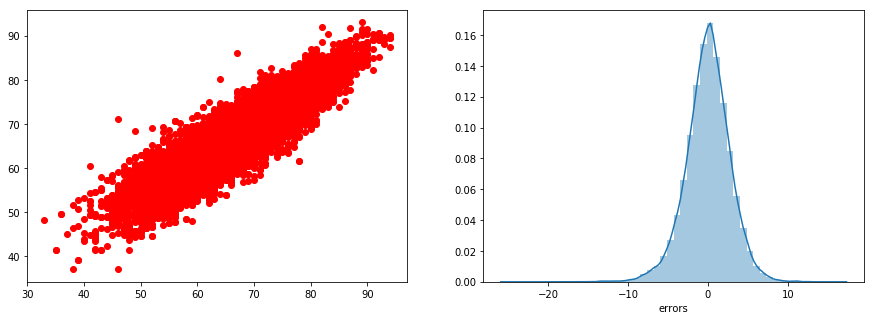

In [435]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test, pred, c='red')
plt.subplot(1,2,2)
sns.distplot(y_test-pred)
plt.xlabel('errors')

As can be seen in plot2, the error distribution is approx. normal- which is an indicator that is model is a fine choice. However, the unexpected signs on the coefficients say that a better model needs to be investigated.

Evaluation metrics:

In [429]:
print("MAE: ", round(metrics.mean_absolute_error(y_test, pred), 4), "\nMSE: ", round(metrics.mean_squared_error(y_test, pred), 4), "\nRMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))

MAE:  2.1099 
MSE:  7.6611 
RMSE:  2.7679


### Summary statistics & P-values 

Based on significance level 5%, reading the p-values, following attributes are insignificant: volleys, preferred_foot_right and defensive_work_rate_unknown.

In [430]:
import statsmodels.api as sm
from scipy import stats

In [431]:
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.692e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:17:03   Log-Likelihood:            -3.1438e+05
No. Observations:              128784   AIC:                         6.289e+05
Df Residuals:                  128742   BIC:                         6.293e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

We have re-run the above model after removing the insignificant variables. R^2 has not changed, but we now see that all the variables are significant. As per this model, a category 'unknowns' in defensive_work_rate is insignificant to the model. The error distribution is approx. normal.

Given that few of the attributes still have negative signs (unexpected), we shall look for a better model.

In [432]:
lm.fit(x_train.drop(['volleys', 'preferred_foot_right', 'defensive_work_rate_unknown'], axis=1), y_train)
pred=lm.predict(x_test.drop(['volleys', 'preferred_foot_right', 'defensive_work_rate_unknown'], axis=1))
x2 = sm.add_constant(x_train.drop(['volleys', 'preferred_foot_right', 'defensive_work_rate_unknown'], axis=1))
est = sm.OLS(y_train, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.825e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:            -3.1439e+05
No. Observations:              128784   AIC:                         6.288e+05
Df Residuals:                  128745   BIC:                         6.292e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Text(0.5,0,'errors')

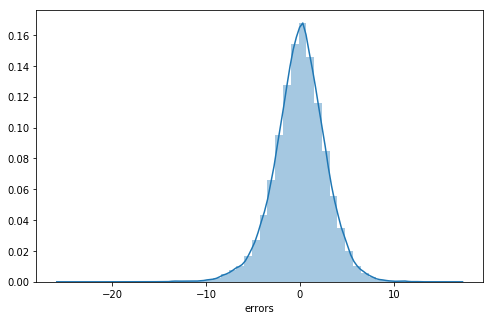

In [434]:
plt.figure(figsize=(8,5))
sns.distplot(y_test-pred)
plt.xlabel('errors')

## PCA

### With Scaling

We shall do PCA here to get a dimensionally reduced dataset, and then proceed with Linear Regression. A screeplot was used to decide the best possible number of principal components to consider in order to explain max. variation in the overall_rating dependent variable. R^2 values of the training dataset has been used for the scree-plot.

In [436]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [452]:
x=player.drop('overall_rating', axis=1)
y=player['overall_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [453]:
sc=StandardScaler()
sc.fit(x_train)
sc.fit(x_test)
scaled_train=sc.transform(x_train)
scaled_test=sc.transform(x_test)

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


In [454]:
pd.DataFrame(scaled_train, columns=x_train.columns).head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_unknown,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_unknown
0,0.237805,0.401075,-0.306591,-0.258460,-0.027932,0.308199,0.330564,0.276973,1.046294,-0.212141,...,-0.325141,-0.383016,-0.142346,-1.754043,-0.219589,0.685135,-0.206054,-0.330764,0.636171,-0.207911
1,1.458928,-0.932083,-0.781425,1.748737,0.112916,-0.354344,-0.743173,-1.101047,-1.258703,0.341591,...,-0.652873,-0.631961,-0.316743,0.570111,4.553952,-1.459565,-0.206054,-0.330764,-1.571905,-0.207911
2,-0.067476,0.574965,1.117914,0.836374,0.112916,0.860319,0.556614,0.332094,0.371661,-0.212141,...,-0.465598,-0.383016,-0.374876,0.570111,-0.219589,-1.459565,-0.206054,-0.330764,0.636171,-0.207911
3,-0.830678,-0.120596,0.959636,0.836374,0.042492,0.970743,0.104514,-0.053752,0.877636,-0.142925,...,-0.652873,-0.196307,-0.607406,0.570111,-0.219589,0.685135,-0.206054,3.023303,-1.571905,-0.207911
4,-0.983319,0.111258,-0.042793,0.349781,0.324187,0.529047,0.387077,0.276973,0.371661,0.480024,...,-0.512416,-0.631961,-0.374876,0.570111,-0.219589,0.685135,-0.206054,-0.330764,0.636171,-0.207911


#### Scree-plot: 

n_components=12 seems like a good choice.

Text(0,0.5,'explained variance R^2')

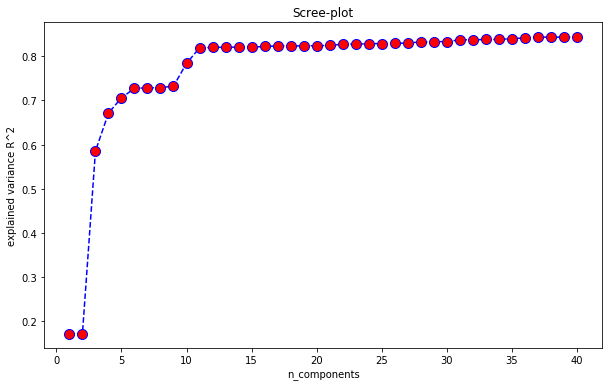

In [439]:
error=[]
for i in range(1,41):
    pca=PCA(n_components=i)
    pca.fit(scaled_train)
    pca_train=pca.transform(scaled_train)
    lm.fit(pca_train, y_train)
    error.append(lm.score(pca_train, y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title("Scree-plot")
plt.xlabel("n_components")
plt.ylabel("explained variance R^2")

In [455]:
pca=PCA(n_components=12)
pca.fit(scaled_train)
pca.fit(scaled_test)
pca_train=pca.transform(scaled_train)
pca_test=pca.transform(scaled_test)

In [456]:
lm.fit(pca_train, y_train)
print("intercept: ", lm.intercept_, "\n", "R^2: ", lm.score(pca_train, y_train))
x2 = sm.add_constant(pca_train)
est = sm.OLS(y_train, x2)
est2 = est.fit()
print(est2.summary())

intercept:  68.59050653723635 
 R^2:  0.8202846227173871
                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                 4.898e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:33:31   Log-Likelihood:            -3.2327e+05
No. Observations:              128784   AIC:                         6.466e+05
Df Residuals:                  128771   BIC:                         6.467e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [442]:
pred=lm.predict(pca_test)
print(pd.DataFrame(pred, y_test.index, columns=['overall_rating_predicted']).head())
print(pd.DataFrame(y_test).head())

        overall_rating_predicted
89795                  75.622395
145987                 66.691866
81345                  63.875434
40399                  73.509973
143301                 73.715888
        overall_rating
89795             81.0
145987            72.0
81345             65.0
40399             76.0
143301            76.0


### Model Evaluation

Text(0.5,0,'errors')

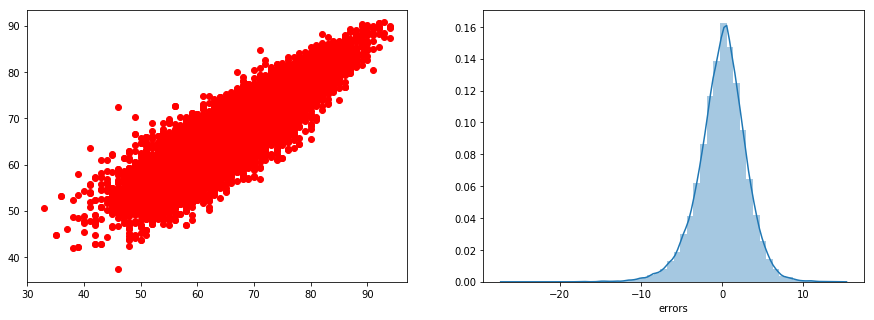

In [444]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test, pred, c='red')
plt.subplot(1,2,2)
sns.distplot(y_test-pred)
plt.xlabel('errors')

The metrics obtained indicate that the PCA-led linear regression is also a fine model. It is not possible to isolate effects of individual attributes at this point, only the joint effect. However, RMSE is slightly more than the previous regression model (although a very low value when one considers the size of the dataset). Hence, we will explore one more model to predict values for overall_rating.

In [377]:
print("MAE: ", round(metrics.mean_absolute_error(y_test, pred), 4), "\nMSE: ", round(metrics.mean_squared_error(y_test, pred), 4), "\nRMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))

MAE:  2.2451 
MSE:  8.8001 
RMSE:  2.9665


## PCA

### Without Scaling

Since all the attributes are actually scores ranging from 1-100, and given that no scores lie outside of that range, the attributes are technically all of the same unit measurement. Hence, it could be a good choice to avoid scaling as well.

Text(0,0.5,'explained variance R^2')

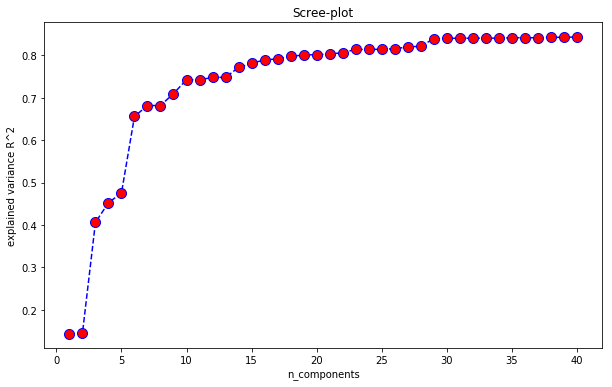

In [384]:
error=[]
for i in range(1,41):
    pca=PCA(n_components=i)
    pca.fit(x_train)
    pca_train=pca.transform(x_train)
    lm.fit(pca_train, y_train)
    error.append(lm.score(pca_train, y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title("Scree-plot")
plt.xlabel("n_components")
plt.ylabel("explained variance R^2")

Procceding with n_components=10

In [457]:
pca=PCA(n_components=10)
pca.fit(x_train)
pca.fit(x_test)
pca_train=pca.transform(x_train)
pca_test=pca.transform(x_test)
lm.fit(pca_train, y_train)
print("intercept: ", lm.intercept_, "\n", "R^2: ", lm.score(pca_train, y_train))
x2 = sm.add_constant(pca_train)
est = sm.OLS(y_train, x2)
est2 = est.fit()
print(est2.summary())

intercept:  68.59105345402567 
 R^2:  0.742647973840334
                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 3.716e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:34:06   Log-Likelihood:            -3.4639e+05
No. Observations:              128784   AIC:                         6.928e+05
Df Residuals:                  128773   BIC:                         6.929e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

The model R^2 has reduced as compared to the previous Linear model with PCA that incorporated scaling. The error plots look normal and is indicative of the model being a fine choice; However since it is not better than the previous, we will create one more model, one where individual attributes can be interpreted.

In [458]:
pred=lm.predict(pca_test)
print(pd.DataFrame(pred, y_test.index, columns=['overall_rating_predicted']).head())
print(pd.DataFrame(y_test).head())

        overall_rating_predicted
89795                  73.703819
145987                 67.400710
81345                  67.106888
40399                  70.859003
143301                 69.608091
        overall_rating
89795             81.0
145987            72.0
81345             65.0
40399             76.0
143301            76.0


### Model Evaluation

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'errors')

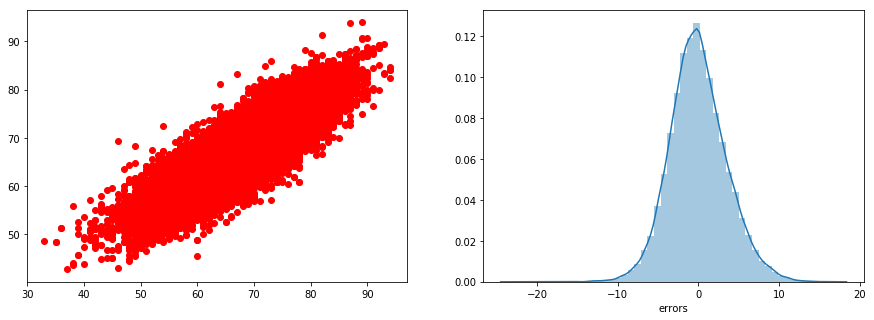

In [392]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test, pred, c='red')
plt.subplot(1,2,2)
sns.distplot(y_test-pred)
plt.xlabel("errors")

PCA without scaling has not provided us with much greater performance than its counterpart. The model seems fine, and the error distribution appears normal. However, the model can explain only upto 74% variation in the dependent variable. We will continue investigating for better models for this dataset.

In [459]:
print("MAE: ", round(metrics.mean_absolute_error(y_test, pred), 4), "\nMSE: ", round(metrics.mean_squared_error(y_test, pred), 4), "\nRMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))

MAE:  2.7532 
MSE:  12.4904 
RMSE:  3.5342


## Random Forest 

We definitely see an improvement in the predicted values. The fit or R^2 has jumped to 99%, and none of the attribute coeeficients have negative signs. The signs and magnitudes are hence, as expected.

A quick glance at the coefficients show that increase in 'reactions' score can raise overall rating by 0.48 points, the highest so far.

In [460]:
x=player.drop('overall_rating', axis=1)
y=player['overall_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [461]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
print("R^2: ", round(rfr.score(x_train, y_train), 4))
coefs=pd.DataFrame(rfr.feature_importances_, x_train.columns, columns=['Coefficients'])
coefs

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2:  0.9951


,Coefficients
potential,0.231059
crossing,0.009335
finishing,0.007423
heading_accuracy,0.019323
short_passing,0.003771
volleys,0.001990
dribbling,0.005884
curve,0.001624
free_kick_accuracy,0.001448
long_passing,0.002685


In [462]:
pred=rfr.predict(x_test)
print(pd.DataFrame(pred, y_test.index, columns=['overall_rating_predicted']).head())
print(pd.DataFrame(y_test).head())

        overall_rating_predicted
89795                      80.40
145987                     71.10
81345                      65.30
40399                      75.56
143301                     78.20
        overall_rating
89795             81.0
145987            72.0
81345             65.0
40399             76.0
143301            76.0


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'errors')

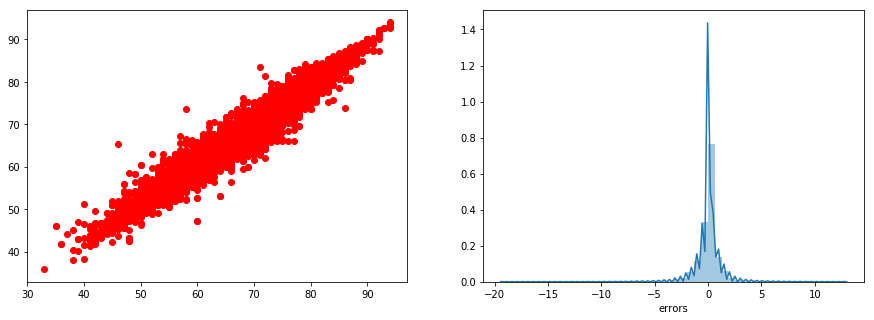

In [463]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test, pred, c='red')
plt.subplot(1,2,2)
sns.distplot(y_test-pred)
plt.xlabel('errors')

We definitely see an improvement in the predicted values. The fit or R^2 has jumped to 99%, and none of the attribute coeeficients have negative signs. The signs and magnitudes are hence, as expected.

A quick glance at the coefficients show that increase in 'reactions' score can raise overall rating by 0.48 points, the highest so far.

In [383]:
print("MAE: ", round(metrics.mean_absolute_error(y_test, pred), 4), "\nMSE: ", round(metrics.mean_squared_error(y_test, pred), 4), "\nRMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))

MAE:  0.5899 
MSE:  1.0761 
RMSE:  1.0374


## Conclusion:

Of all the models considered here, the obvious choice would be the Random Forests regressor, which has explained the dependent variable upto 99.5%. It can be seen from the predictions and y-test values how similar they are. Since all the attributes are related to performance, it makes sense that the coefficients for all the attributes are positive. All the listed attributes can hence be concluded as contributing to explaining the overall_rating score. Player reactions to changes on the field has the highest contribution to overall_rating when all other attributes are kept constant, and this is a very reasonable interpretaion. The palyer who can best respond to changes that happen on the field, can be seen as the one who wields his abilities well at the apt time.